In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d
from PIL import Image, ImageFilter
import cv2
import math
import os

In [7]:
gal1 = Image.open('Mosaic/galaxy1.jpg')
gal2 = Image.open('Mosaic/galaxy2.jpg')

In [8]:
campic = plt.imread('Pyramids/cameraman.jpg')
hillpic = Image.open('Pyramids/hill_gray.png')
lenapic = Image.open('Pyramids/lena.png')
parrotpic = Image.open('Pyramids/parrot.png')
einpic = Image.open('einstein.jpg')

einarr = np.array(einpic)
lena = np.array(lenapic)

In [27]:
lenanorm = lena/255

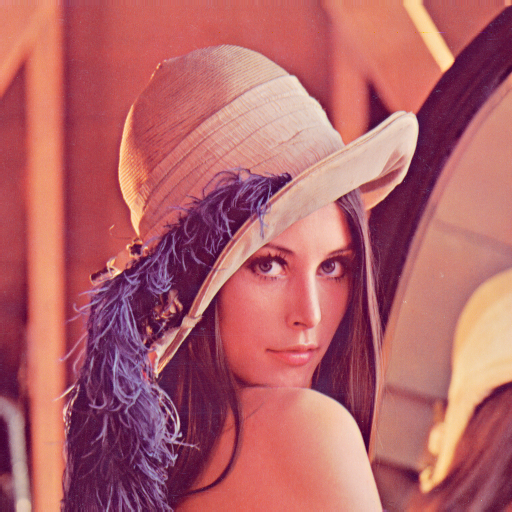

In [38]:
shownorm(lenanorm)

In [37]:
def shownorm(imgarr):
    imgarr = (imgarr*255).astype(np.uint8)
    display(Image.fromarray(imgarr))

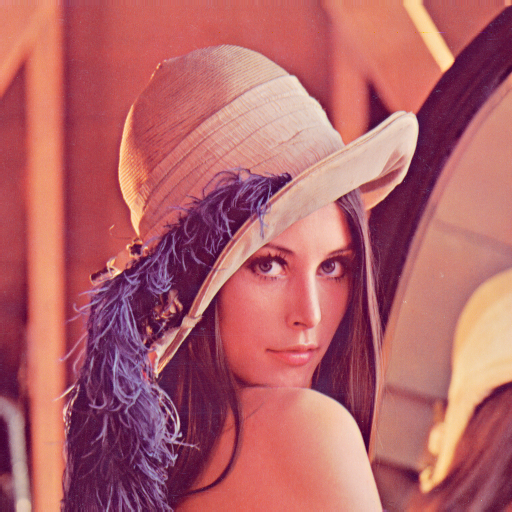

In [4]:
lenapic

In [22]:
def show(arr):
    display(Image.fromarray(arr))

In [23]:
def pad(imgarr, padw, padh, *args, **kwargs):
    if len(imgarr.shape) > 2:
        thing = (np.pad(imgarr, ((padw,padw),(padh,padh),(0,0)), *args, **kwargs))
        return np.pad(imgarr, ((padw,padw),(padh,padh),(0,0)), *args, **kwargs)
    else:
        return np.pad(imgarr, ((padw,padw),(padh,padh)), *args, **kwargs)
    
def convolution2d(imgarr, vertkern, horkern, padmode='constant'):
    return convolution1d((convolution1d(imgarr, vertkern, axis=0)), horkern, axis=1)

def convolution1d(imgarr, kernel, padmode='constant', axis=0):
    global n
    #axis=0 - vertical
    #axis=1 - horizontal
    l = len(kernel)
    padsize = math.floor(l/2)
    result = np.zeros(imgarr.shape)
    paddedimg = pad(imgarr, padsize, padsize, mode=padmode)
    if len(imgarr.shape) == 2:
        if axis == 0:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    result[i][j] = np.sum(paddedimg[i:i+l, j]*kernel)
        else:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    result[i][j] = np.sum(paddedimg[i, j:j+l]*kernel)
    elif len(imgarr.shape) == 3:
        if axis == 0:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    cut = paddedimg[i:i+l, j]
                    b, g, r    = cut[:, 0], cut[:, 1], cut[:, 2]
                    b = np.sum(b*kernel)
                    g = np.sum(g*kernel)
                    r = np.sum(r*kernel)
                    result[i][j] = [b,g,r]
        else:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    cut = paddedimg[i:i+l, j]
                    b, g, r    = cut[:, 0], cut[:, 1], cut[:, 2]
                    b = np.sum(b*kernel)
                    g = np.sum(g*kernel)
                    r = np.sum(r*kernel)
                    result[i][j] = [b,g,r]
    else:
        if axis == 0:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    cut = paddedimg[i:i+l, j]
                    b, g, r, a    = cut[:, 0], cut[:, 1], cut[:, 2], cut[:, 3]
                    b = np.sum(b*kernel)
                    g = np.sum(g*kernel)
                    r = np.sum(r*kernel)
                    result[i][j] = [b,g,r,a]
        else:
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    cut = paddedimg[i:i+l, j]
                    b, g, r    = cut[:, 0], cut[:, 1], cut[:, 2]
                    b = np.sum(b*kernel)
                    g = np.sum(g*kernel)
                    r = np.sum(r*kernel)
                    result[i][j] = [b,g,r]

    return result

In [24]:
def gaussianfilter(imgarr, sigma, size):
    kernel = gaussiankernel1d(sigma, size)
    result = convolution2d(imgarr, kernel, kernel)
    return(result)

def gaussiankernel1d(sigma, size):
    result = np.zeros(size)
    k = 1/(sigma*math.sqrt(2*math.pi))
    mid = int((size-1)/2)
    for i in range(mid+1):
        value = k*math.exp(-i*i/(2*sigma*sigma))
        result[mid-i] = value
        result[mid+i] = value
    return(result)

In [25]:
def pyrDown(imgarr):
    shape = imgarr.shape
    cols = []
    for i in range(0, shape[1], 2):
        cols.append(i)
    rows = []
    for i in range(0, shape[0], 2):
        rows.append(i)
    imgarr = np.delete(imgarr, cols, 1)
    imgarr = np.delete(imgarr, rows, 0)
    return imgarr

def pyrUp(imgarr):
    shape = list(imgarr.shape)
    shape[0] = shape[0]*2
    shape[1] = shape[1]*2
    shape = tuple(shape)
    final = np.zeros(shape)
    if len(imgarr.shape)==2:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                final[2*i,2*j] = imgarr[i,j]
        finalimg = (Image.fromarray(final).convert('RGB')).filter(ImageFilter.GaussianBlur)
                
    elif len(imgarr.shape)==3:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                for k in range(imgarr.shape[2]):
                    final[2*i,2*j,k] = imgarr[i,j,k]
        final = final.astype(np.uint8)
        finalimg = (Image.fromarray(final).convert('RGB')).filter(ImageFilter.GaussianBlur)

    else:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                for k in range(imgarr.shape[2]):
                    final[2*i,2*j,k,h] = imgarr[i,j,k,h]
        final = final.astype(np.uint8)
        finalimg = (Image.fromarray(final).convert('RGB')).filter(ImageFilter.GaussianBlur)
    return np.array(np.array(finalimg)*4)


In [10]:
def makepyr(img, kernel, lvls):
    G = []
    arr = np.array(img)
    gpA = [arr]
    for i in range(lvls):
        arr = makepyrDown(arr)
        gpA.append(arr)
        
    return gpA

In [49]:
def makepyrDown(imgarr):
    shape = imgarr.shape
    cols = []
    for i in range(0, shape[1], 2):
        cols.append(i)
    rows = []
    for i in range(0, shape[0], 2):
        rows.append(i)
    imgarr = np.delete(imgarr, cols, 1)
    imgarr = np.delete(imgarr, rows, 0)
    shownorm(imgarr)
    return imgarr

def makepyrUp(imgarr, kernel):
    shape = list(imgarr.shape)
    shape[0] = shape[0]*2
    shape[1] = shape[1]*2
    shape = tuple(shape)
    final = np.zeros(shape)
    if len(imgarr.shape)==2:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                final[2*i,2*j] = imgarr[i,j]
        finalimg = convolution2d(final, kernel, kernel)                
    elif len(imgarr.shape)==3:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                for k in range(imgarr.shape[2]):
                    final[2*i,2*j,k] = imgarr[i,j,k]
        final = final.astype(np.uint8)
        finalimg = convolution2d(final, kernel, kernel)
    else:
        for i in range(imgarr.shape[0]):
            for j in range(imgarr.shape[1]):
                for k in range(imgarr.shape[2]):
                    for h in range(imgarr.shape[3]):
                        final[2*i,2*j,k,h] = imgarr[i,j,k,h]
        final = final.astype(np.uint8)
        finalimg = convolution2d(final, kernel, kernel)    
    result = np.array(np.array(finalimg)*4)
    shownorm(result)
    return result


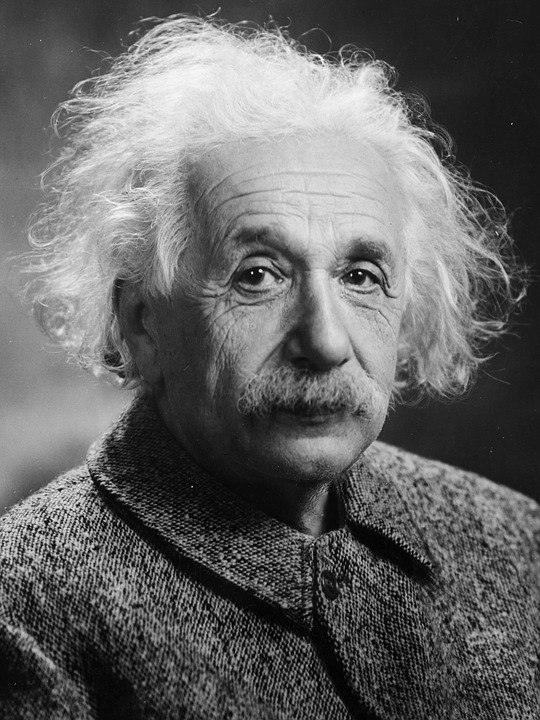

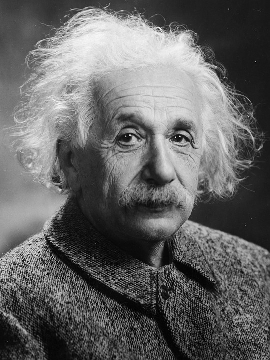

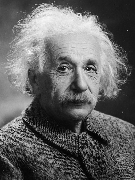

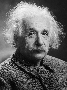

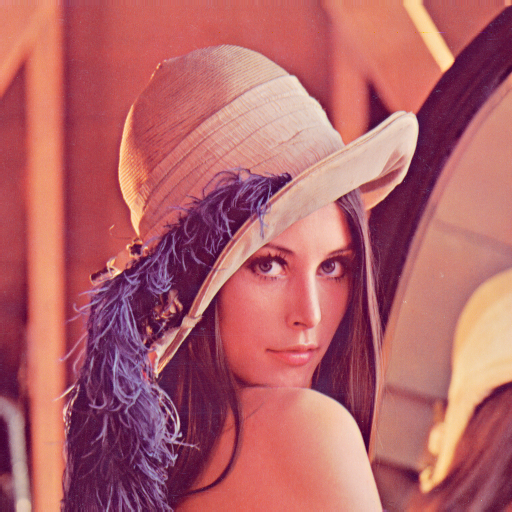

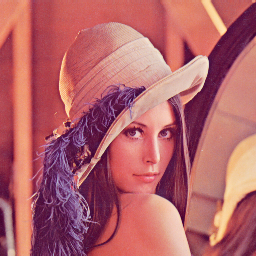

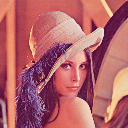

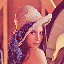

In [12]:
gausskern = gaussiankernel1d(1, 3)
einpyr = makepyr(einpic, gausskern, 3)
for i in einpyr:
    display(Image.fromarray(i).convert('RGB'))
    
lenapyr = makepyr(lenapic, gausskern, 3)
for i in lenapyr:
    display(Image.fromarray(i).convert('RGB'))

In [29]:
def pyramid(im, kernel, levels=5):
    p = [im]
    i = 0
    filt = np.array([kernel])
    size = len(kernel)
    while i < levels:
        filtered = []
        for j in range(p[-1].shape[2]):
            padded = np.pad(p[-1][:,:,j], (size//2,), mode='constant')
            filtered.append(convolve2d(convolve2d(padded, filt, 'valid'), filt.T, 'valid'))
        filtered = np.transpose(np.array(filtered, dtype='|u1'), axes=(1,2,0))
        p.append(filtered[::2, ::2])
        i += 1
    return p

In [20]:
def gaussian_pyramid(im, levels=5): 
    return pyramid(im, [1/16,1/4,3/8,1/4,1/16], levels)

C:\Users\samar\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


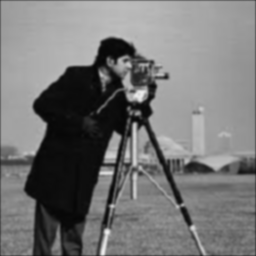

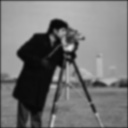

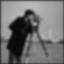

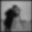

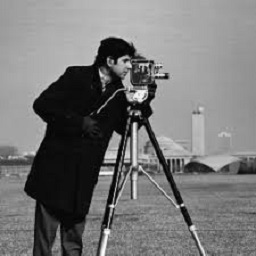

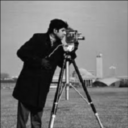

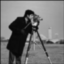

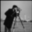

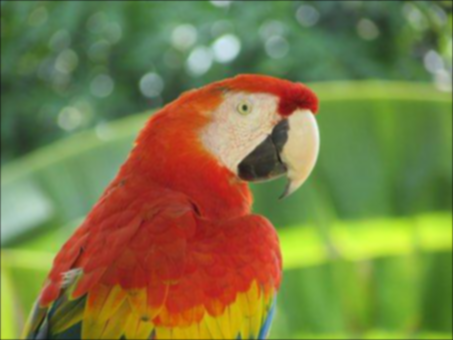

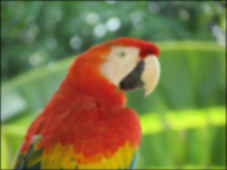

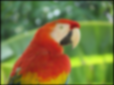

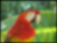

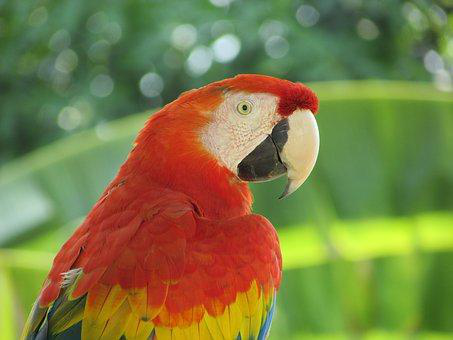

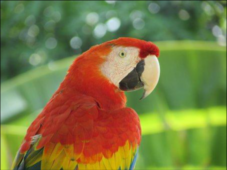

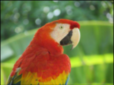

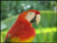

In [30]:
images = [campic, np.array(parrotpic)]

for im in images:
    pyr = gaussian_pyramid(np.array(Image.fromarray(im).convert("RGBA" if im[-3:] == "png" else "RGB")))
    for i in pyr:
        display(Image.fromarray(i))

In [14]:
def expand(im):
    expanded = np.empty((im.shape[0]*2, im.shape[1]*2, im.shape[2]))
    kernel_1d = 1./16 * np.array([[1, 4, 6, 4, 1]])
    w = kernel_1d.T.dot(kernel_1d)
    for i in np.arange(2*im.shape[0]):
        for j in np.arange(2*im.shape[1]):
            expanded[i][j] = 4*sum([w[m][n]*im[((i-m)//2)][((j-n)//2)] if (i-m)%2 ==0 and (j-n)%2 == 0 else 0 for n in range(5) for m in range(5)])
    return expanded

In [15]:
def laplacian_pyramid(im, levels=5):
    p = []
    g = gaussian_pyramid(im, levels)
    i = 0
    while i < levels-1:
        p.append(np.array(g[i] - expand(g[i+1]), dtype='|u1'))
        i += 1
    p.append(np.array(g[-1], dtype='|u1'))
    return p

C:\Users\samar\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


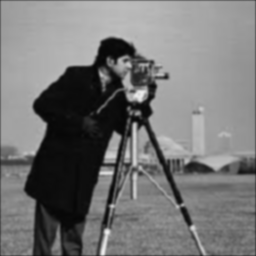

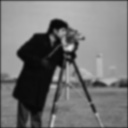

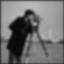

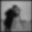

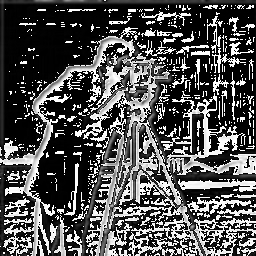

NameError: name 'j' is not defined

In [36]:
images = [campic]

for im in images:
    pyr = laplacian_pyramid(np.array(Image.fromarray(im).convert("RGBA" if im[-3:] == "png" else "RGB")))
    for i in pyr:
        display(Image.fromarray(i).convert("RGB"))
        display(Image.fromarray((upsamp(i)).convert("RGB")))

In [35]:
def upsamp(imgarr, kernel=[1/16,1/4,3/8,1/4,1/16]):
    filt = np.array([kernel])
    up = pyrUp(imgarr)
    padded = np.pad(up[:,:,j], (size//2,), mode='constant')
    blurred = convolve2d(convolve2d(padded, filt, 'valid'), filt.T, 'valid')
    return blurred

pyrimgs = makepyr(einpic, 3)
einpyr = {}
num = 1
for i in pyrimgs:
    einpyr[num] = i
    num+=1

for i in eingpyr.keys():
    display(Image.fromarray(eingpyr[i]))
    thing = eingpyr[i]
    for j in range(i):
        thing = pyrUp(thing)
    display(Image.fromarray(thing))
    
for i in eingpyr:
    display(Image.fromarray(i))
    display((Image.fromarray(pyrUp(i))).convert('RGB'))

In [13]:
bikernel = list(map(lambda x:x/16, [1,4,6,4,1]))
bikernel

[0.0625, 0.25, 0.375, 0.25, 0.0625]

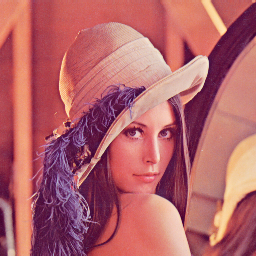

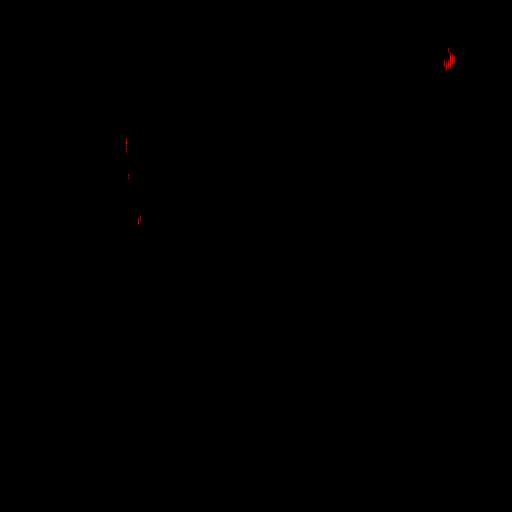

<class 'numpy.ndarray'>
float64
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [50]:
#display(einpic)
#display(Image.fromarray(makepyrDown(einarr)).convert('RGB'))
#display(Image.fromarray(makepyrUp(makepyrDown(einarr), bikernel)).convert('RGB'))
deb = makepyrUp(makepyrDown(lenanorm), bikernel)
print(type(deb))
print(deb.dtype)
print(deb[0])
print(deb[1])
print(deb[2])
print(deb[3])

In [29]:
deb = deb.astype(np.uint8)
deb = deb*255

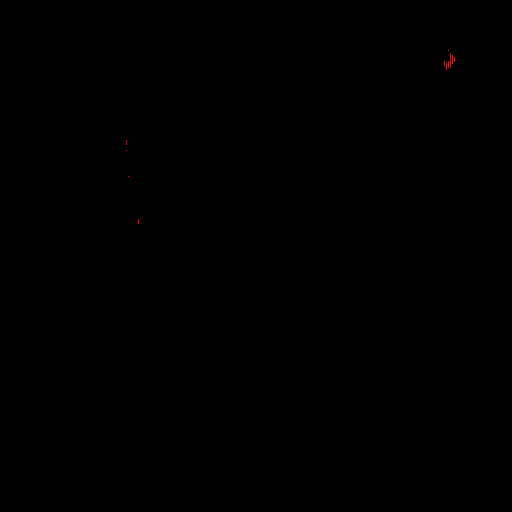

In [30]:
display(Image.fromarray(deb).convert('RGB'))

In [ ]:
def residuewat(img):
    array = np.array(img)
    blurarray = img.filter(ImageFilter.GaussianBlur)
    new = blurarray - array
    display(Image.fromarray(new))

In [ ]:
img = cv2.imread('Pyramids/parrot.png')
lower_reso = cv2.pyrDown(img)

In [ ]:
G = np.array(lenapic)
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

ls_ = lpA[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, lpA[i])
    
show(ls_)

In [ ]:
mything = np.array(einpic)
mything = cv2.pyrUp(cv2.pyrDown(mything))
show(mything - np.array(einpic))